<a href="https://colab.research.google.com/github/scmiriam/Perceptron/blob/main/Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearly separable classification with a perceptron

Perceptrons not only can model logical functions, but they are linear classifiers that work well for linearly separable problems.

In [1]:
import numpy as np
import sklearn.linear_model

import matplotlib.pyplot as plt

def plot_decision_boundary(net):
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    w = net.coef_[0]
    b = net.intercept_[0]
    if not w[1]==0:
        a = -w[0] / w[1]
        xx = np.linspace(xmin, xmax)
        yy = a * xx - b / w[1]
    elif not w[0]==0:
        a = -w[1] / w[0]
        yy = np.linspace(ymin, ymax)
        xx = a * yy - b / w[0]
    else:
        xx = []
        yy = []
    plt.plot(xx,yy, 'b-')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])

def plot_data(x,y):
    plt.rcParams['figure.figsize'] = (3.0, 3.0)
    colormap = np.array(['r', 'k'])
    plt.scatter(x[:,0], x[:,1], c=colormap[y.astype(int)], s=50);
    plt.axis([-1.2,1.2,-1.2,1.2]);

%matplotlib inline

## Load in the data

Let's imagine that there are two classes of dots (red and black). Each dot is defined by two features. The dataset consists of a matrix `x` with as many rows as dots, and two columns, and the vector `y` with as many elements as dots. The value of `y[i]` is 0 for red dots and 1 for black dots.

You must fill in the values of the second row of matrix `x` and vector `y`, at your choice, with these restrictions:
* the values of matrix `x` must be between 1 and 7 (inclusive)
* the values of vector `y` must be 0's (red dots) or 1's (black dots)
* there should be between 5 and 9 red dots (inclusive)
* the set of red dots must be **linearly separable** from the set of black dots

In [2]:
# FILL IN THE MISSING VALUES

x = np.array([[2,2],[1,3],[2,3],[5,3],[7,3],[2,4],[3,4],\
               [1,1]    ,[2,1]     ,[3,1]     ,[7,6]     ,[6,7]     ,[6,5]     ,[7,5] ])

y = np.array([ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

## Plot the data

Let's represent graphically the data. Make sure that the sets are linearly separable.

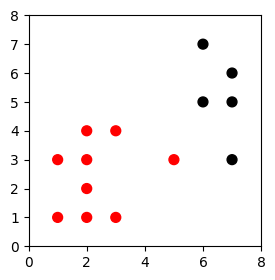

In [3]:
# DON'T MODIFY THIS CODE
plot_data(x, y)
plt.axis([0,8,0,8]);

## Build the model
Create a [perceptron object](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [4]:
# ADD THE NECESSARY STATEMENTS HERE
net = sklearn.linear_model.Perceptron(max_iter=1, tol=1e-3, warm_start=True)

## Train
Repeat the following cell (`Ctrl+Enter`) until the model converges.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Coefficient 0:  3.000
Coefficient 1:  0.000
         Bias: -16.000
    Target: [0 0 0 0 1 0 0 0 0 0 1 1 1 1]
Prediction: [0 0 0 0 1 0 0 0 0 0 1 1 1 1]


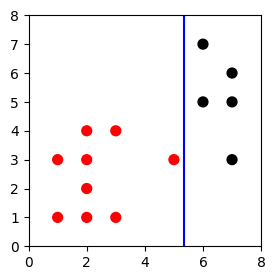

In [5]:
# ADD THE NECESSARY STATEMENTS HERE
net.fit(x, y)
while np.array_str(net.predict(x)) != np.array_str(y):
    net.fit(x, y)


# DON'T MODIFY THE CODE BELOW
print("Coefficient 0: %6.3f" % net.coef_[0,0])
print("Coefficient 1: %6.3f" % net.coef_[0,1])
print("         Bias: %6.3f" % net.intercept_)
plot_data(x, y)
plt.axis([0,8,0,8]);
plot_decision_boundary(net)
print('    Target: %s' % np.array_str(y))
print('Prediction: %s' % np.array_str(net.predict(x)))

When the model converges, the perceptron boundary completely separates the samples of each class (0's and 1's).